<a href="https://colab.research.google.com/github/ncukaran18csu103/karan_18csu103/blob/master/COVID_MASK_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import os
os.environ['KAGGLE_USERNAME']='karanchoudhary103'
os.environ['KAGGLE_KEY']='648aa78fa9c0e55ea8d98b6d92e10c53'


In [5]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 93% 193M/207M [00:10<00:01, 13.5MB/s]
100% 207M/207M [00:10<00:00, 21.0MB/s]


In [6]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [7]:
main_dir='/content/New Masks Dataset'
train_dir=os.path.join(main_dir,'Train')
test_dir=os.path.join(main_dir,'Test')
valid_dir=os.path.join(main_dir,'Validation')

train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'Non Mask')

In [8]:

train_mask_names=os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names=os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0421.jpg', '1512.jpg', '0714.jpg', '0831.jpg', '0168.png', '1234.jpg', '0888.jpg', '1107.jpg', '0037.jpg', '0150.jpg']
['49.jpg', '327.jpg', '157.jpg', '348.jpg', '289.jpg', '312.jpg', '260.jpg', '90.jpg', '26.jpg', '37.jpg']


['/content/New Masks Dataset/Train/Mask/0421.jpg', '/content/New Masks Dataset/Train/Mask/1512.jpg', '/content/New Masks Dataset/Train/Mask/0714.jpg', '/content/New Masks Dataset/Train/Mask/0831.jpg', '/content/New Masks Dataset/Train/Mask/0168.png', '/content/New Masks Dataset/Train/Mask/1234.jpg', '/content/New Masks Dataset/Train/Mask/0888.jpg', '/content/New Masks Dataset/Train/Mask/1107.jpg']
['/content/New Masks Dataset/Train/Non Mask/49.jpg', '/content/New Masks Dataset/Train/Non Mask/327.jpg', '/content/New Masks Dataset/Train/Non Mask/157.jpg', '/content/New Masks Dataset/Train/Non Mask/348.jpg', '/content/New Masks Dataset/Train/Non Mask/289.jpg', '/content/New Masks Dataset/Train/Non Mask/312.jpg', '/content/New Masks Dataset/Train/Non Mask/260.jpg', '/content/New Masks Dataset/Train/Non Mask/90.jpg']


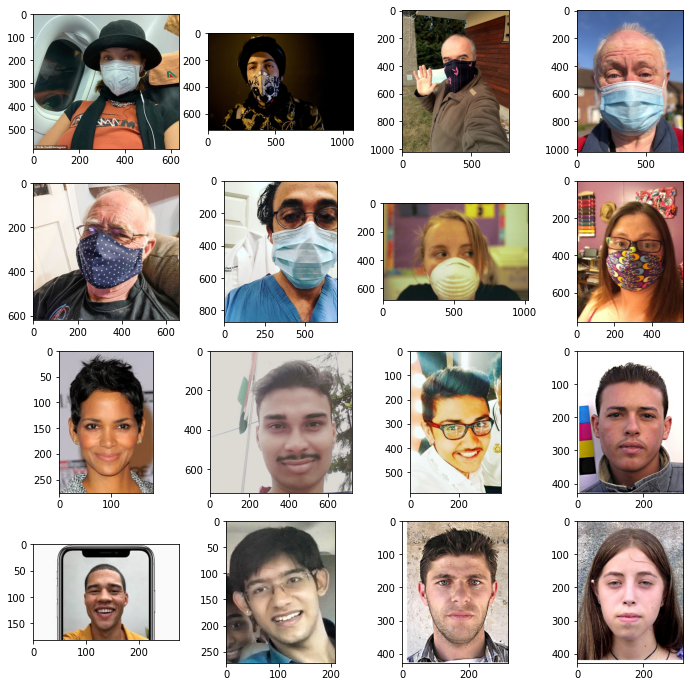

In [13]:
import matplotlib.image as mpimg
nrows=4
ncols=4
plt.figure(figsize=(12,12))

mask_pic=[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))
print(mask_pic)


nomask_pic=[]
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))
print(nomask_pic)

merged_list=mask_pic+nomask_pic
for i in range(0,len(merged_list)):
    data = merged_list[i].split('/',4)[4]
    sp = plt.subplot(nrows,ncols,i+1)
    image= mpimg.imread(merged_list[i])
    plt.imshow(image,cmap='gray')
plt.show()

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,rotation_range=40,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='binary')
valid_generator=validation_datagen.flow_from_directory(valid_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [15]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [16]:
test_generator.image_shape

(150, 150, 3)

In [32]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

In [33]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

Epoch 1/30
19/19 [==============================] - 13s 672ms/step - loss: 7.2940 - accuracy: 0.5050 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 12s 620ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 12s 625ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/30
19/19 [==============================] - 12s 625ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/30
19/19 [==============================] - 12s 620ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/30
19/19 [==============================] - 12s 623ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 7/30
19/19 [==============================] - 12s 622ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

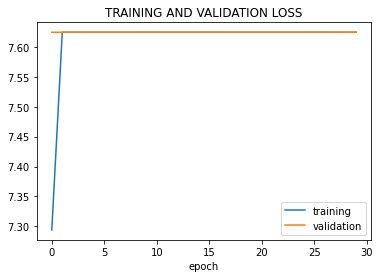

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('TRAINING AND VALIDATION LOSS')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

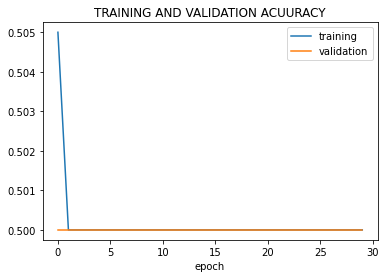

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('TRAINING AND VALIDATION ACUURACY')
plt.xlabel('epoch')

In [38]:
test_loss,test_acc=model.evaluate(test_generator)

4/4 [==============================] - 1s 211ms/step - loss: 7.6246 - accuracy: 0.5000


In [45]:
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fname in uploaded.keys():
    img_path='/content/'+fname
    img=image.load_img(img_path,target_size=(150,150))
    images=image.img_to_array(img)
    images=np.expand_dims(images,axis=0)
    prediction=model.predict(images)
    print(fname)
    if prediction==0:
      print('mask')
    else :
        print('no mask')

Saving Screenshot (635).png to Screenshot (635).png
Saving snap.jpg to snap (3).jpg
Screenshot (635).png
no mask
snap.jpg
no mask


In [48]:
model.save('MASK_DETECTION.h5')